# Analyse and run models using FerPlus dataset

In this notebook we are going to build, test, analyze and compare the model with the previous versions. This is followed by improvements to the model and the data. We run this cycle a few times until we achieve realistic and nice results.

This model has been build in [this](https://github.com/BB8-2020/EmpathicRobot/tree/main/models/classification_model) file. 

If you have any quesentions about this notebook, you can send us a mail at maria.dukmak@student.hu.nl

In [1]:
import sys
# You need to change this path to your project path
sys.path.append('/Users/storm/OneDrive/Documenten/HU/Jaar_2/BB8/EmpathicRobot')
from conv_model import *
from models.functions import *
from models.classification_model.model_functions import *
from tensorflow.keras import Sequential

## Read data
As we have done before, our data is ready to use. In this section we will use **ferPlus** to train the model. This data has already been read, prepared and stored in [this](https://github.com/BB8-2020/EmpathicRobot/tree/main/data) file.
For now, our data is in a pickel file that we will read as follows:

For simplicity, we set up the path to the data as follows, you can also set it to your own path.

In [2]:
os.chdir(os.getcwd() + '/data/')

We immediately split the data into train, test and validation set.

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = read_data(str('ferPlus_processed'))

As we see, the data consists of train set that contains 80% of the data. The validation and the test set are equal in size 20% and are used to subsequently test the model.

This data has already been cleaned and normalized so we don't have to do anything with the data anymore.

In [4]:
print(f"Train set: X_train shape:{x_train.shape} Y_train shape:{y_train.shape}")

print(f"Test set: X_test shape:{x_test.shape} Y_test shape:{y_test.shape}")

print(f"Validation set: X_val shape:{x_val.shape} Y_val shape:{y_val.shape}")

Train set: X_train shape:(28390, 48, 48, 1) Y_train shape:(28390, 7)
Test set: X_test shape:(3549, 48, 48, 1) Y_test shape:(3549, 7)
Validation set: X_val shape:(3549, 48, 48, 1) Y_val shape:(3549, 7)


## Models

In [5]:
# We create all the models that we got 
models = build_models(input_shape=(48, 48, 1), num_classes=7)

### Model version 1 

Now it is finally time to start working on the model. We are going to start with the following model:

In [6]:
model1 = Sequential(models[0]['layers'], name = models[0]['name'])

Let's check the summary out:

In [7]:
model1.summary()

Model: "Sequential_version_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 12

Looks good, time to compile!

### Compile and train

To compile the model we use Adam optimaizer and binary crossentropy as los function. Let us now train the model.

In [8]:
compile_model(model1)

In [9]:
history = fit_model(model1, 64, 70, False, x_train, y_train, x_val, y_val, x_test)

Epoch 1/70
443/443 - 12s - loss: 0.3202 - accuracy: 0.5207 - val_loss: 0.3368 - val_accuracy: 0.5032
Epoch 2/70
443/443 - 9s - loss: 0.2705 - accuracy: 0.6338 - val_loss: 0.2652 - val_accuracy: 0.6447
Epoch 3/70
443/443 - 9s - loss: 0.2460 - accuracy: 0.6937 - val_loss: 0.2584 - val_accuracy: 0.6627
Epoch 4/70
443/443 - 8s - loss: 0.2263 - accuracy: 0.7481 - val_loss: 0.2372 - val_accuracy: 0.7016
Epoch 5/70
443/443 - 9s - loss: 0.2117 - accuracy: 0.7891 - val_loss: 0.2511 - val_accuracy: 0.6971
Epoch 6/70
443/443 - 9s - loss: 0.1974 - accuracy: 0.8243 - val_loss: 0.2318 - val_accuracy: 0.7405
Epoch 7/70
443/443 - 10s - loss: 0.1869 - accuracy: 0.8516 - val_loss: 0.2282 - val_accuracy: 0.7444
Epoch 8/70
443/443 - 9s - loss: 0.1787 - accuracy: 0.8766 - val_loss: 0.2334 - val_accuracy: 0.7278
Epoch 9/70
443/443 - 9s - loss: 0.1722 - accuracy: 0.8899 - val_loss: 0.2309 - val_accuracy: 0.7461
Epoch 10/70
443/443 - 9s - loss: 0.1680 - accuracy: 0.9002 - val_loss: 0.2226 - val_accuracy: 0.75

Now we're going to test our model using the test set for the model.

In [10]:
test_loss, test_acc = evaluate_model(model1, x_test, y_test,  64)

56/56 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.7704


In [11]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.2502
Test accuracy: 0.7704


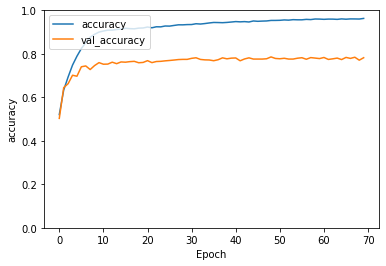

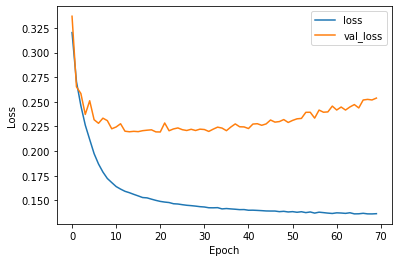

In [12]:
plot_acc_loss(history)

In [13]:
# Save the model into a tenserflow lite version
save_model_to_lite(model1, test_acc)

INFO:tensorflow:Assets written to: C:\Users\storm\AppData\Local\Temp\tmpqpj26lqo\assets


On the basis of the graphs we see that the model is very overfitted. Which means the results of the model are not good. We can try to solve that by making the model deeper

As we saw above, the results are not too great. Therefore we will now try to adjust the settings of the model .

### Model version 2

Now we are going the same as above. So we are going to creat the model, complie it and fit it.

In [14]:
model2 = Sequential(models[1]['layers'], name = models[1]['name'])

In [15]:
model2.summary()

Model: "Sequential_version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64

Perfect! Lets compile 

### Compile and train

In [16]:
compile_model(model2)

In [17]:
history = fit_model(model2, 64, 70, False, x_train, y_train, x_val, y_val, x_test)

Epoch 1/70
443/443 - 14s - loss: 0.3351 - accuracy: 0.4739 - val_loss: 0.3561 - val_accuracy: 0.4018
Epoch 2/70
443/443 - 13s - loss: 0.2821 - accuracy: 0.6016 - val_loss: 0.2775 - val_accuracy: 0.6205
Epoch 3/70
443/443 - 12s - loss: 0.2597 - accuracy: 0.6536 - val_loss: 0.2520 - val_accuracy: 0.6777
Epoch 4/70
443/443 - 13s - loss: 0.2436 - accuracy: 0.6929 - val_loss: 0.2457 - val_accuracy: 0.6833
Epoch 5/70
443/443 - 13s - loss: 0.2319 - accuracy: 0.7257 - val_loss: 0.2408 - val_accuracy: 0.7061
Epoch 6/70
443/443 - 12s - loss: 0.2228 - accuracy: 0.7465 - val_loss: 0.2311 - val_accuracy: 0.7143
Epoch 7/70
443/443 - 13s - loss: 0.2145 - accuracy: 0.7666 - val_loss: 0.2339 - val_accuracy: 0.7278
Epoch 8/70
443/443 - 13s - loss: 0.2073 - accuracy: 0.7860 - val_loss: 0.2303 - val_accuracy: 0.7318
Epoch 9/70
443/443 - 13s - loss: 0.2008 - accuracy: 0.8033 - val_loss: 0.2208 - val_accuracy: 0.7416
Epoch 10/70
443/443 - 13s - loss: 0.1945 - accuracy: 0.8222 - val_loss: 0.2248 - val_accura

Now we're going to test our model using the test set for the model.

In [18]:
test_loss, test_acc = evaluate_model(model2, x_test, y_test,  64)

56/56 [==============================] - 1s 9ms/step - loss: 0.2384 - accuracy: 0.7819


In [19]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.2384
Test accuracy: 0.7819


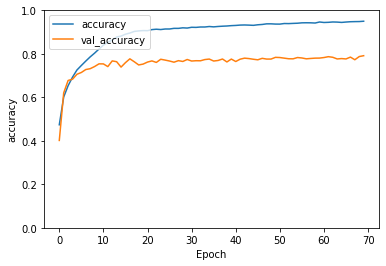

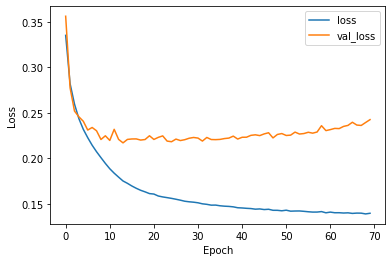

In [20]:
plot_acc_loss(history)

In [21]:
save_model_to_lite(model2, test_acc)

INFO:tensorflow:Assets written to: C:\Users\storm\AppData\Local\Temp\tmps9bkwqsf\assets


INFO:tensorflow:Assets written to: C:\Users\storm\AppData\Local\Temp\tmps9bkwqsf\assets


The results are going beter, next we are going to try to add some argumentation to the data. That could help our model to leren more. You can find the file where the data has been argumendated right [here](https://github.com/BB8-2020/EmpathicRobot/tree/main/data).

## Augment data

We split the data again:

In [22]:
datagen, x_train_arg, y_train_arg, x_val_arg, y_val_arg, x_test_arg, y_test_arg = read_data('ferPlus_augment', True)

Now we are going to just fit the model using this data.

In [23]:
history = fit_model(model2, 64, 100, True, datagen, x_train_arg, y_train_arg, x_val_arg, y_val_arg, x_test_arg)

Epoch 1/100
443/443 - 13s - loss: 0.2422 - accuracy: 0.7045 - val_loss: 0.2130 - val_accuracy: 0.7658
Epoch 2/100
443/443 - 13s - loss: 0.2240 - accuracy: 0.7418 - val_loss: 0.2069 - val_accuracy: 0.7768
Epoch 3/100
443/443 - 13s - loss: 0.2170 - accuracy: 0.7567 - val_loss: 0.2061 - val_accuracy: 0.7878
Epoch 4/100
443/443 - 13s - loss: 0.2129 - accuracy: 0.7629 - val_loss: 0.2048 - val_accuracy: 0.7887
Epoch 5/100
443/443 - 13s - loss: 0.2111 - accuracy: 0.7692 - val_loss: 0.2059 - val_accuracy: 0.7822
Epoch 6/100
443/443 - 13s - loss: 0.2080 - accuracy: 0.7798 - val_loss: 0.2023 - val_accuracy: 0.7937
Epoch 7/100
443/443 - 13s - loss: 0.2068 - accuracy: 0.7820 - val_loss: 0.1984 - val_accuracy: 0.8005
Epoch 8/100
443/443 - 13s - loss: 0.2047 - accuracy: 0.7873 - val_loss: 0.1987 - val_accuracy: 0.8045
Epoch 9/100
443/443 - 13s - loss: 0.2036 - accuracy: 0.7897 - val_loss: 0.1999 - val_accuracy: 0.7926
Epoch 10/100
443/443 - 13s - loss: 0.2024 - accuracy: 0.7923 - val_loss: 0.1995 - 

Epoch 81/100
443/443 - 13s - loss: 0.1746 - accuracy: 0.8651 - val_loss: 0.1865 - val_accuracy: 0.8326
Epoch 82/100
443/443 - 14s - loss: 0.1743 - accuracy: 0.8691 - val_loss: 0.1860 - val_accuracy: 0.8340
Epoch 83/100
443/443 - 13s - loss: 0.1738 - accuracy: 0.8716 - val_loss: 0.1874 - val_accuracy: 0.8323
Epoch 84/100
443/443 - 13s - loss: 0.1740 - accuracy: 0.8698 - val_loss: 0.1859 - val_accuracy: 0.8405
Epoch 85/100
443/443 - 14s - loss: 0.1739 - accuracy: 0.8708 - val_loss: 0.1869 - val_accuracy: 0.8346
Epoch 86/100
443/443 - 15s - loss: 0.1739 - accuracy: 0.8678 - val_loss: 0.1860 - val_accuracy: 0.8346
Epoch 87/100
443/443 - 14s - loss: 0.1740 - accuracy: 0.8691 - val_loss: 0.1842 - val_accuracy: 0.8462
Epoch 88/100
443/443 - 13s - loss: 0.1735 - accuracy: 0.8692 - val_loss: 0.1865 - val_accuracy: 0.8366
Epoch 89/100
443/443 - 13s - loss: 0.1732 - accuracy: 0.8709 - val_loss: 0.1852 - val_accuracy: 0.8391
Epoch 90/100
443/443 - 13s - loss: 0.1730 - accuracy: 0.8724 - val_loss: 

Now we're going to test our model using the test set for the model.

In [24]:
test_loss, test_acc = evaluate_model(model2, x_test_arg, y_test_arg, 64)

56/56 [==============================] - 1s 9ms/step - loss: 0.1871 - accuracy: 0.8338


In [25]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.1871
Test accuracy: 0.8338


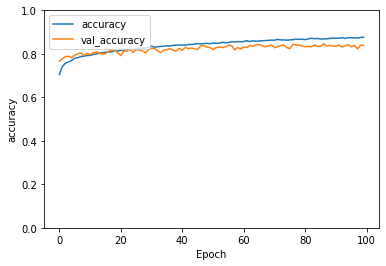

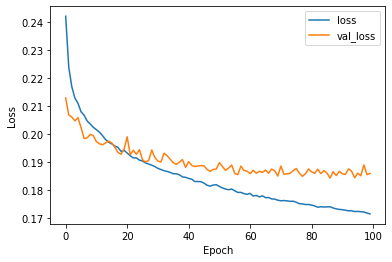

In [26]:
plot_acc_loss(history)

Okay! We definitely see an improvement in the model! These results are good enough for now! Let's save the model

In [27]:
save_model_to_lite(model2, test_acc)

INFO:tensorflow:Assets written to: C:\Users\storm\AppData\Local\Temp\tmp4tmums1m\assets


INFO:tensorflow:Assets written to: C:\Users\storm\AppData\Local\Temp\tmp4tmums1m\assets


In [28]:
save_all_model(model2, test_acc)

INFO:tensorflow:Assets written to: saved_all_model8337\assets


INFO:tensorflow:Assets written to: saved_all_model8337\assets


Model is saved in a file.


## Conclusion


As we have seen, we have saved the last model as `final model` for now. We will use this model in the final version for the project.